# IPCV Assignment 1

Authors:

- Mauro Dore             - mauro.dore@studio.unibo.it            -
- Gian Mario Marongiu    - gianmario.marongiu@studio.unibo.it    - 0001092260
- Riccardo Murgia        - riccardo.murgia2@studio.unibo.it      -

## Imports and Auxiliary Functions

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np


In [4]:
def show_multiple_images(image_list, cols=3, titles=None, global_title=None, plot_height=3):
    num_images = len(image_list)

    # Check if titles list is provided and if its length matches the image list
    if titles is not None and len(titles) != num_images:
        raise ValueError("The length of the titles list must match the length of the image list.")

    rows = math.ceil(num_images / cols)

    plt.figure(figsize=(20, plot_height * rows))

    # Set the global title if provided
    if global_title:
        plt.suptitle(global_title, fontsize=16, fontweight='bold')

    for i, image in enumerate(image_list):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        # Set the individual subplot title if provided
        if titles is not None:
            plt.title(titles[i], fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()
    
def png_to_numpy(path, list):
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image = cv2.imread(image_path)
        list.append(image)


In [5]:
MODELS_SINGLE_INSTANCE_PATH = "models_single_instance"
SCENES_SINGLE_INSTANCE_PATH = "scenes_single_instance"
MODELS_MULTIPLE_INSTANCES_PATH = "models_multiple_instances"
SCENES_MULTIPLE_INSTANCES_PATH = "scenes_multiple_instances"

models_single_instance = []
scenes_single_instance = []
models_multiple_instances = []
scenes_multiple_instances = []

png_to_numpy(MODELS_SINGLE_INSTANCE_PATH, models_single_instance)
png_to_numpy(SCENES_SINGLE_INSTANCE_PATH, scenes_single_instance)
png_to_numpy(MODELS_MULTIPLE_INSTANCES_PATH, models_multiple_instances)
png_to_numpy(SCENES_MULTIPLE_INSTANCES_PATH, scenes_multiple_instances)
    
print(f"{len(models_single_instance)} models and {len(scenes_single_instance)} scenes for single instance detection task")
print(f"{len(models_multiple_instances)} models and {len(scenes_multiple_instances)} scenes for multiple instances detection task")


14 models and 5 scenes for single instance detection task
13 models and 7 scenes for multiple instances detection task


## Task Analysis

The objective is to perform instance detection using the provided model images. Several challenges must be addressed:

- The scenes contain significant noise, which must be mitigated prior to detection;
- The models are noticeably brighter than the scenes, indicating the need for a method that is robust to intensity variations;
- The models and scenes exhibit considerable variation in shape, necessitating the use of a scale-invariant detector.

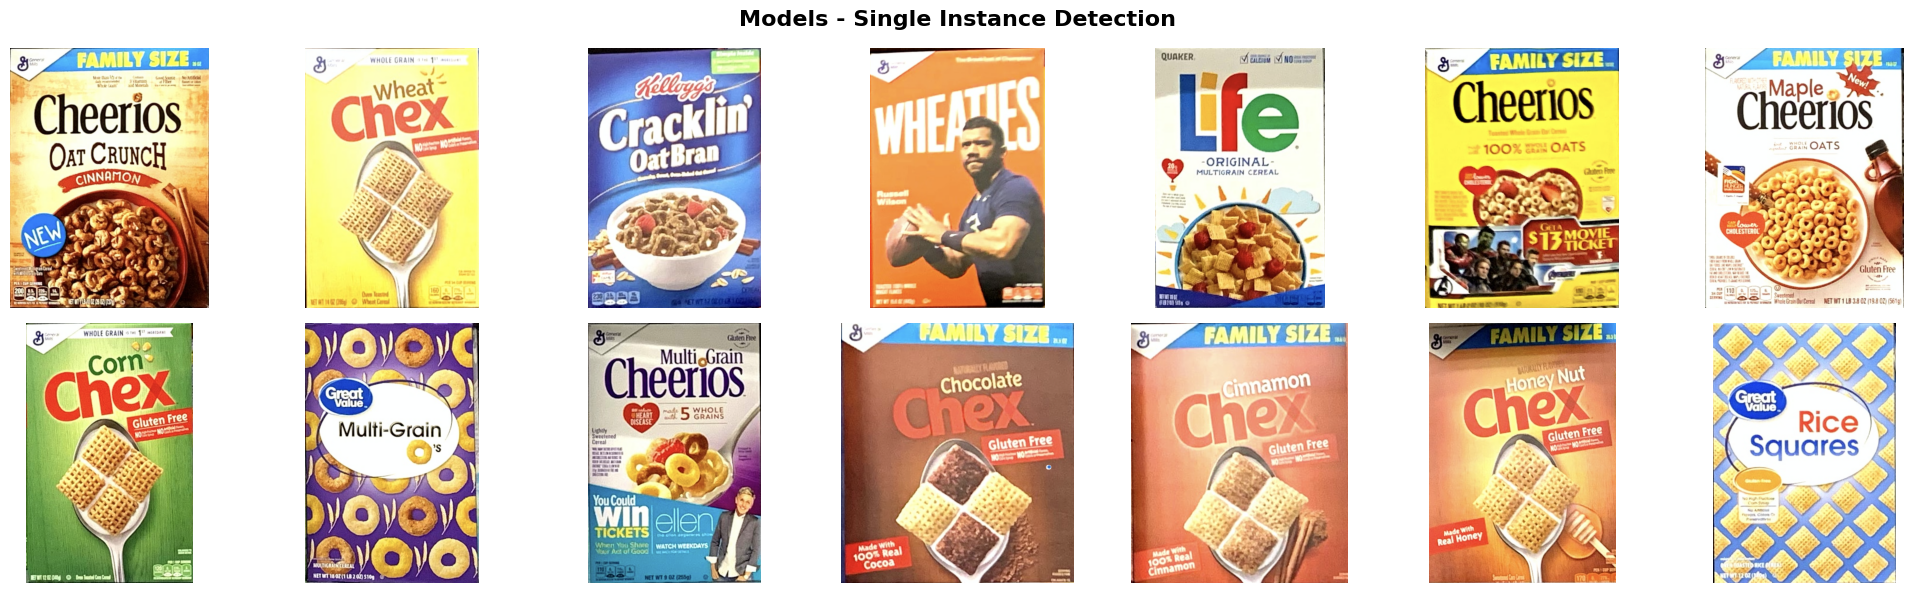

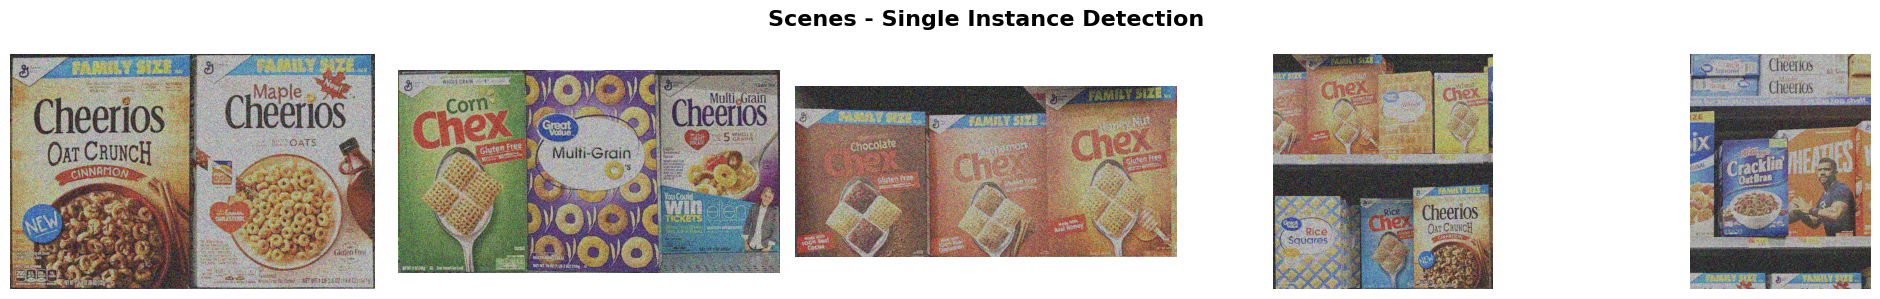

In [6]:
show_multiple_images(models_single_instance, cols=7, global_title="Models - Single Instance Detection")
show_multiple_images(scenes_single_instance, cols=5, global_title="Scenes - Single Instance Detection")


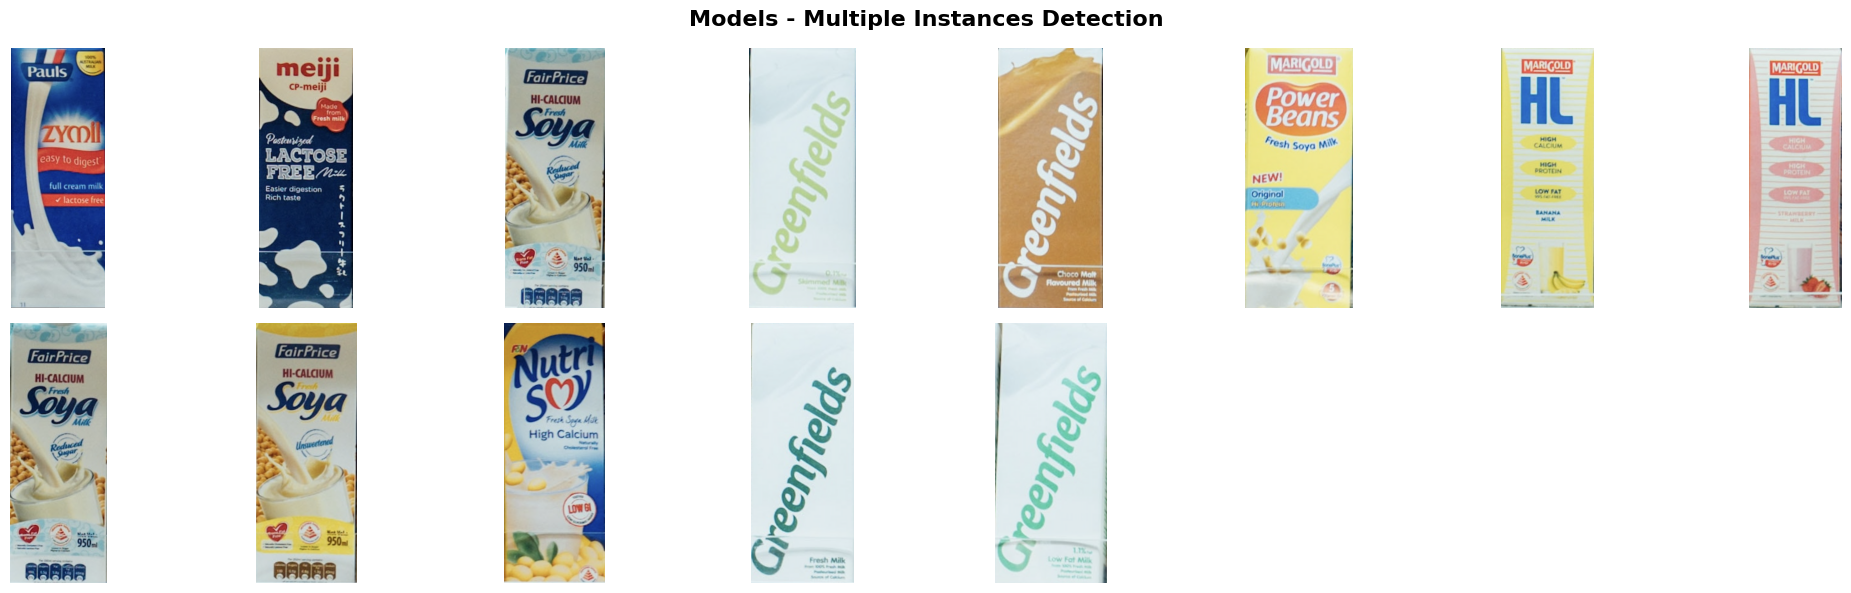

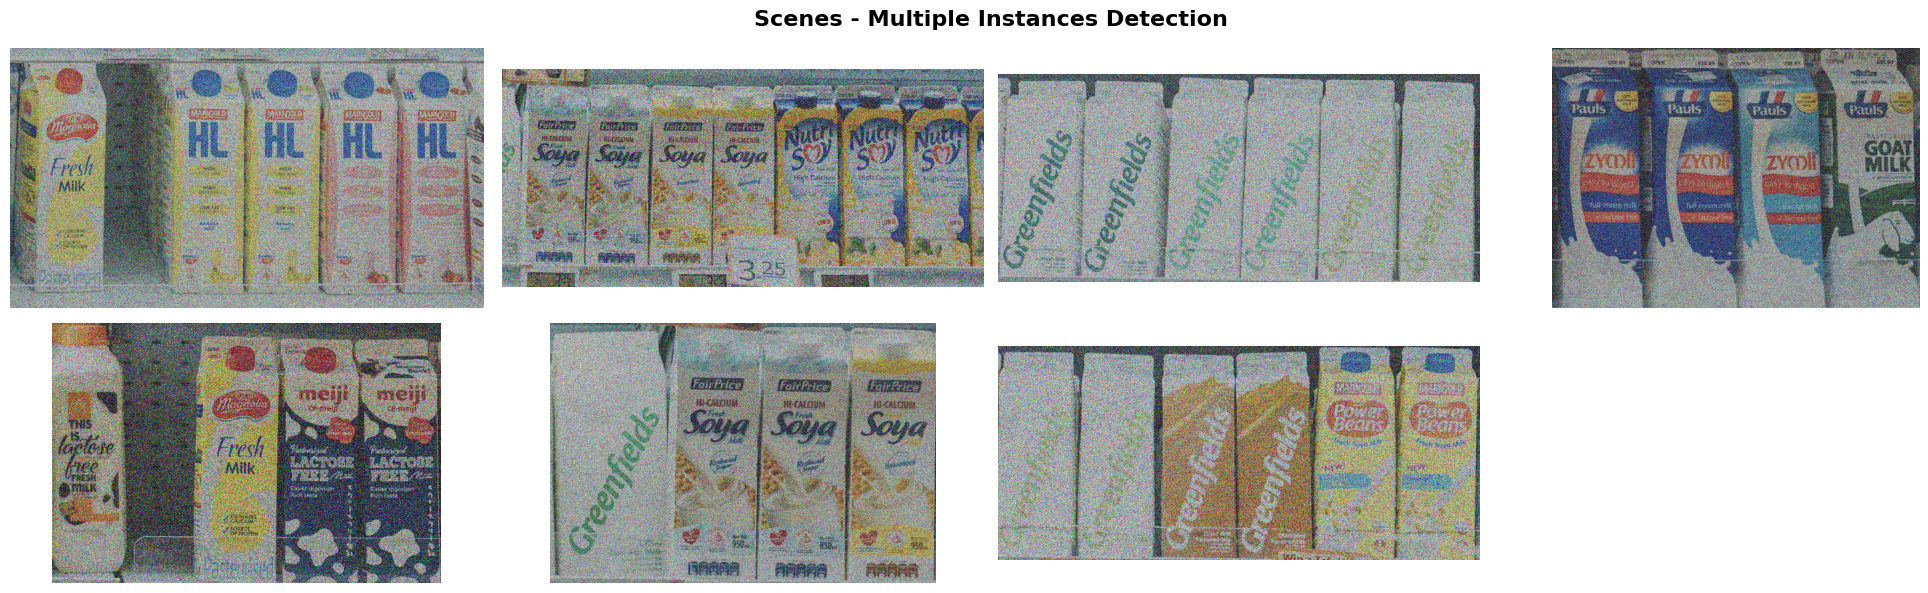

In [7]:
show_multiple_images(models_multiple_instances, cols=8, global_title="Models - Multiple Instances Detection")
show_multiple_images(scenes_multiple_instances, cols=4, global_title="Scenes - Multiple Instances Detection")


## Scenes Denoising

In [8]:
"""
NOTE by Gian: ho visto che median filter lavora molto bene, ho provato anche bilateral e non-local means ma non sono riuscito a farli funzionare così bene.
"""

denoised_scenes_single_instance = []
denoised_scenes_multiple_instances = []
kernel_size = 5

for scene in scenes_single_instance:
    denoised_scene = cv2.medianBlur(scene, kernel_size)
    denoised_scenes_single_instance.append(denoised_scene)
    
for scene in scenes_multiple_instances:
    denoised_scene = cv2.medianBlur(scene, kernel_size)
    denoised_scenes_multiple_instances.append(denoised_scene)

# example of denoised image
random_idx = np.random.randint(len(scenes_single_instance))
show_multiple_images([scenes_single_instance[random_idx], denoised_scenes_single_instance[random_idx]], 
                     global_title=f"Median Filter with Kernel size: {kernel_size}", 
                     titles=["Before Filtering", "After Filtering"], 
                     cols=2,
                     plot_height=8)


In [9]:
# todo: provare a inserire una seconda fase di denoising oppure sostituire completamente median filter con NLM filter. Bisogna testare. Qua sotto provavo a vedere se NLM riusciva a togliere un po' di quel rumorino che si è lasciato dietro il median.

"""esempio = denoised_scenes_single_instance[random_idx]
denoised_esempio = cv2.fastNlMeansDenoisingColored(esempio, None, 10, 10, 7, 15) 

# Display the original and denoised image
show_multiple_images([esempio, denoised_esempio], 
                     global_title="Non-Local Means Denoising", 
                     titles=["Before Filtering", "After Filtering"], 
                     cols=2,
                     plot_height=8)""";

## Single Instance Detection

In [10]:
# todo: detectare tutto. Idea by Gian: Usiamo un feature extractor tipo DoG con descriptor SIFT che dovrebbe essere abbastanza invariante ai cambi in illuminazione. Poi con le feature estratte creiamo lo star model per fare l'effettiva detection.

## Multiple Instances Detection

#todo: tuttoooooo